# Image Compression Using Clustering

In [239]:
from skimage import io
from sklearn.cluster import KMeans
import numpy as np

In [240]:
image_name = 'star'

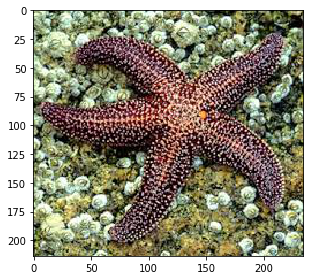

In [241]:
image = io.imread(image_name + '.jpg')
io.imshow(image)

In [242]:
image.shape

(214, 235, 3)

In [243]:
rows, cols = image.shape[0], image.shape[1]
image = image.reshape(rows * cols, 3)

print(image.shape)
print(image[:5])

(50290, 3)
[[240 253 207]
 [222 235 189]
 [235 248 202]
 [249 255 218]
 [233 249 202]]


In [244]:
kMeans = KMeans(n_clusters = 16)
kMeans.fit(image)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=16, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [245]:
centers = np.asarray(kMeans.cluster_centers_, dtype = np.uint8)
centers

array([[140, 151, 115],
       [ 60,  50,  34],
       [238, 248, 226],
       [163, 126, 124],
       [187, 201, 167],
       [ 16,   7,   3],
       [116,  80,  80],
       [100, 105,  67],
       [208, 167, 161],
       [119, 119, 100],
       [219, 222, 194],
       [162, 172, 144],
       [ 44,  24,  14],
       [ 82,  73,  52],
       [178, 171, 108],
       [140, 133,  78]], dtype=uint8)

In [246]:
labels = np.asarray(kMeans.labels_, dtype = np.uint8)
print(labels.shape)
labels = np.reshape(labels, (rows, cols))
print(labels.shape)
labels

(50290,)
(214, 235)


array([[ 2, 10,  2, ...,  0,  7, 13],
       [11, 11, 11, ..., 11,  7,  1],
       [ 1,  0,  4, ...,  7, 13,  1],
       ...,
       [ 0,  7,  9, ..., 13,  5, 13],
       [ 7,  7,  1, ...,  7,  1,  9],
       [ 7, 13, 12, ...,  9,  0, 10]], dtype=uint8)

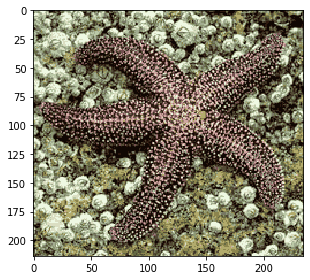

In [247]:
newImage = np.zeros((rows, cols, 3), dtype = np.uint8)
for i in range(rows):
    for j in range(cols):
            # assign every pixel the rgb color of their label's center
            newImage[i, j, :] = centers[labels[i, j], :]
io.imsave('sk_kmeans_' + image_name + '.jpg', newImage)

io.imshow(newImage)

In [248]:
iters = 5
num_centroids = 16
# centroids = np.random.randint(low=0, high=256, size=(num_centroids, 3))
centroids = image[np.random.choice(len(image), size=num_centroids)]
centroids

Array([[140, 136,  88],
       [ 20,   0,   0],
       [ 56,  56,  46],
       [ 30,  16,  13],
       [176, 161, 106],
       [135, 134,  80],
       [ 36,  23,   0],
       [ 63,  52,  60],
       [254, 252, 239],
       [ 19,  31,  29],
       [161, 163, 126],
       [ 15,  19,   0],
       [247, 199, 195],
       [ 81,  20,  25],
       [  9,  15,   5],
       [198, 216, 178]], dtype=uint8)

In [249]:
for it in range(iters):
    regions = [[] for _ in range(num_centroids)]
    for i in range(len(image)):
        dists = [np.linalg.norm(image[i]-c) for c in centroids]
        c = np.argmin(dists)
        regions[c].append(i)
    centroids = [np.mean([image[i] for i in r], axis=0) for r in regions]

In [250]:
newImage = [0] * len(image)
for i in range(len(image)):
    dists = [np.linalg.norm(image[i]-c) for c in centroids]
    c = np.argmin(dists)
    newImage[i] = [int(centroids[c][0]),
                   int(centroids[c][1]),
                   int(centroids[c][2])]

C:\Users\user\Anaconda3\lib\site-packages\skimage\io\_io.py:141: UserWarning: kmeans_star.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
Lossy conversion from int32 to uint8. Range [1, 249]. Convert image to uint8 prior to saving to suppress this warning.
C:\Users\user\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:75: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


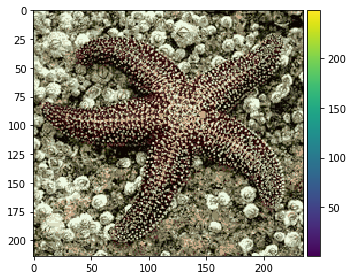

In [251]:
newImage = np.array(newImage)
newImage = newImage.reshape((rows, cols, 3))

io.imsave('kmeans_' + image_name + '.jpg', newImage)

io.imshow(newImage)